In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 15
import matplotlib
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'
matplotlib.rcParams.update({'font.size': 15})

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 
#matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='7'
matplotlib.rcParams['lines.linewidth'] = 2

In [2]:
import RateTheories as rt

In [3]:
# (first, for conversion from my units to yours)
k = 1.38064852e-23 # m2 kg s-2 K-1
T = 300 # K
amu = 1.66054e-27 # kg
kT= k*300*1e18/(amu*1e24)
print('1 kT =',kT,'amu nm^2/ps^2')

1 kT = 2.494336517036626 amu nm^2/ps^2


\begin{equation}
    \tau_D = \frac{L^2 \gamma}{k_{\mathrm{B}}T} \approx \frac{1000}{2.49} \mathrm{ps}.
\end{equation}

In [4]:
def CalculateRateTheoryInputParams(tm_by_td,tg_by_td,
                                   VNeq=3, # kT
                                   L=1., # nm
                                   gamma=1000.): # amu/ps
    global kT
    td = L**2*gamma/kT # ps
    tm = td*tm_by_td # ps
    alpha = tg_by_td*tm_by_td*td**2 # ps^2
    w0 = np.sqrt(8*VNeq/(td*tm)) # ps^{-1}
    wNeq = np.sqrt(4*VNeq/(td*tm)) # ps^{-1}
    gamma_by_m = 1./(td*tm_by_td) # ps^{-1}
    return gamma_by_m, alpha, VNeq, wNeq, w0, td, tm


# Mean first passage time as function of damping coefficient

Note that $\tau_m/\tau_{D} \propto \gamma^{-2}$, so that we choose $\tau_m/\tau_D$ as x-axis. For the y-axis, we take $\tau_{FP}/\tau_D$.

In [5]:
tm_by_td = np.logspace(-5,5,num=600)
#tg_by_td = np.logspace(-3,2,num=6)
tg_by_td_string = ['0.01','1.0','10.0']
tg_by_td = np.array(tg_by_td_string,
                    dtype=float)


RatesPGH = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesGH = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesKramers = np.zeros([len(tg_by_td),len(tm_by_td)])
RatesMM = np.zeros([len(tg_by_td),len(tm_by_td)])
td_array = np.zeros([len(tg_by_td),len(tm_by_td)])

VNeq = 3.
S1_integral = rt.S1_integral(VNeq)

for i,e in enumerate(tg_by_td):
    for j,f in enumerate(tm_by_td):
        gamma_by_m, alpha, VNeq, wNeq, w0, td, tm = CalculateRateTheoryInputParams(f,
                                                                                   e,
                                                                                   gamma=1000,
                                                                                  VNeq=VNeq)
        td_array[i,j] = td
        RatesGH[i,j] = rt.GH(gamma_by_m,VNeq,wNeq,w0,e*td)
        RatesPGH[i,j] = rt.PGH(gamma_by_m,alpha,VNeq,wNeq,w0)[0].real
        RatesKramers[i,j] = rt.Kramers(gamma_by_m,w0,wNeq,VNeq)
        RatesMM[i,j] = rt.MM(tm,td,VNeq,wNeq,w0,S1_integral)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


In [6]:
td_array[0]

array([400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90821474,
       400.90821474, 400.90821474, 400.90821474, 400.90

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


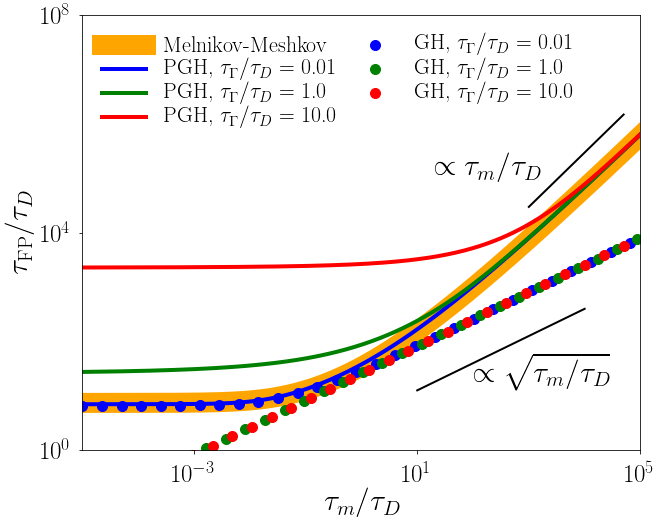

In [7]:
Colors = ['blue',
          'green',
          'red']
LsPGH = '-'
MarkerPGH = ''

LsGH = ''
MarkerGH = 'o'
StrideGH = 21
ShiftsGH = [0,7,14]

LsLangevin = ''
MarkerLangevin = 'x'

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(tm_by_td,1./RatesMM[0]/td_array[0],
       lw=20,
        color='orange',
       label=r'Melnikov-Meshkov')
for i,e in enumerate(tg_by_td):
    ax.plot(tm_by_td,1./RatesPGH[i]/td_array[i],
            ls=LsPGH,
            marker=MarkerPGH,
            lw=4,
            color=Colors[i],
               label=r'PGH, $\tau_{\Gamma}/\tau_{D}=$ ' + str(e))
List_of_lws=[6,4,2]
List_of_ms=[10,10,10]
for i,e in enumerate(tg_by_td):
    ax.plot(tm_by_td[ShiftsGH[i]::StrideGH],1./RatesGH[i][ShiftsGH[i]::StrideGH]/td_array[i][ShiftsGH[i]::StrideGH],
                ls=LsGH,
            marker=MarkerGH,
            markersize=List_of_ms[i],
            lw=List_of_lws[i],
            color=Colors[i],
               label=r'GH, $\tau_{\Gamma}/\tau_{D}=$ ' + str(e))

FS = 30
xPlot = np.array([1e1,1e4])
ax.plot(xPlot,4e0*xPlot**0.5,
       color='black')
ax.text(1e2,1.5e1,
        r'$\propto \sqrt{\tau_{m}/\tau_{D}}$',
       fontsize=FS)
xPlot = np.array([1e3,5e4])
ax.plot(xPlot,3e1*xPlot,
       color='black')
ax.text(2e1,1e5,
        r'$\propto \tau_{m}/\tau_{D}$',
       fontsize=FS)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e0,1e8)
ax.set_yticks(ax.get_yticks()[1::2])
ax.set_ylim(1e0,1e8)
ax.set_xlim(1e-5,1e5)
ax.set_xticks(ax.get_xticks()[::2])
ax.set_xlim(1e-5,1e5)
ax.legend(
          loc='upper left',fontsize=22,ncol=2,
         frameon=False,
         labelspacing=0.1, # the vertical space between the legend entries
         columnspacing=0.7 # the spacing between columns
         )
ax.set_xlabel(r'$\tau_m/\tau_D$',
             fontsize=FS)
ax.set_ylabel(r'$\tau_{\mathrm{FP}}/\tau_D$',
             fontsize=FS)
plt.show(fig)
#fig.savefig('tm_PGH_GH_Langevin_broad_plot.pdf',
#           bbox_inches='tight')
plt.close(fig)